In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


In [2]:
# Constants
BATCH_SIZE = 128
LEARNING_RATE = 0.001
EPOCHS = 20

In [3]:
# Load SVHN Dataset
ds_train, ds_test = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True)

def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [32, 32])
    return image, label

ds_train = ds_train.map(preprocess).batch(BATCH_SIZE).shuffle(1000)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HANIN\tensorflow_datasets\svhn_cropped\incomplete.1A3XJW_3.1.0\svhn_cropped-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HANIN\tensorflow_datasets\svhn_cropped\incomplete.1A3XJW_3.1.0\svhn_cropped-test.tfrecord*.…

Generating extra examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\HANIN\tensorflow_datasets\svhn_cropped\incomplete.1A3XJW_3.1.0\svhn_cropped-extra.tfrecord*…

Dataset svhn_cropped downloaded and prepared to C:\Users\HANIN\tensorflow_datasets\svhn_cropped\3.1.0. Subsequent calls will reuse this data.


In [4]:
# TensorFlow CNN Model
def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [5]:
# TensorFlow MLP Model
def create_mlp_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Train CNN Model
cnn_model = create_cnn_model()
cnn_history = cnn_model.fit(ds_train, epochs=EPOCHS, validation_data=ds_test)
cnn_train_acc = cnn_history.history['accuracy'][-1] * 100
cnn_test_acc = cnn_history.history['val_accuracy'][-1] * 100
print(f"CNN Training Accuracy: {cnn_train_acc:.2f}%")
print(f"CNN Testing Accuracy: {cnn_test_acc:.2f}%")

c:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.4822 - loss: 1.5466 - val_accuracy: 0.8165 - val_loss: 0.6776
Epoch 2/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8341 - loss: 0.5902 - val_accuracy: 0.8410 - val_loss: 0.5881
Epoch 3/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8664 - loss: 0.4883 - val_accuracy: 0.8501 - val_loss: 0.5657
Epoch 4/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8780 - loss: 0.4331 - val_accuracy: 0.8584 - val_loss: 0.5120
Epoch 5/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8896 - loss: 0.3958 - val_accuracy: 0.8581 - val_loss: 0.5008
Epoch 6/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 39ms/step - accuracy: 0.8970 - loss: 0.3626 - val_accuracy: 0.8712 - val_loss: 0.4621
Epoch 7/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 24s 40ms/step - accuracy: 0.9032 - loss: 0.3346 - val_accuracy: 0.8756 - val_loss: 0.4476
Epoch 8/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 25s 41ms/step - accuracy: 0.9129 - loss: 0.3017 - 

In [7]:
# Train MLP Model
mlp_model = create_mlp_model()
mlp_history = mlp_model.fit(ds_train, epochs=EPOCHS, validation_data=ds_test)
mlp_train_acc = mlp_history.history['accuracy'][-1] * 100
mlp_test_acc = mlp_history.history['val_accuracy'][-1] * 100
print(f"MLP Training Accuracy: {mlp_train_acc:.2f}%")
print(f"MLP Testing Accuracy: {mlp_test_acc:.2f}%")


Epoch 1/20


c:\Users\HANIN\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


573/573 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.1837 - loss: 2.3194 - val_accuracy: 0.4249 - val_loss: 1.7266
Epoch 2/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 29ms/step - accuracy: 0.4883 - loss: 1.5170 - val_accuracy: 0.5935 - val_loss: 1.2882
Epoch 3/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6292 - loss: 1.1724 - val_accuracy: 0.6409 - val_loss: 1.1809
Epoch 4/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.6764 - loss: 1.0576 - val_accuracy: 0.6682 - val_loss: 1.1019
Epoch 5/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.7016 - loss: 0.9803 - val_accuracy: 0.6781 - val_loss: 1.0943
Epoch 6/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7191 - loss: 0.9227 - val_accuracy: 0.6742 - val_loss: 1.0843
Epoch 7/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7316 - loss: 0.8883 - val_accuracy: 0.7064 - val_loss: 0.9905
Epoch 8/20
573/573 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.7392 - loss: 0.8578 - val_accurac

In [8]:
# Evaluate Models
def evaluate_model(model, ds_test):
    y_true, y_pred, y_prob = [], [], []
    for images, labels in ds_test:
        preds = model.predict(images)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))
        y_prob.extend(preds)
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc = roc_auc_score(y_true, y_prob, multi_class='ovo')
    
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")
    
    fpr, tpr, _ = roc_curve(y_true, np.max(y_prob, axis=1), pos_label=1)
    plt.plot(fpr, tpr, label="ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

CNN Model Evaluation:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s

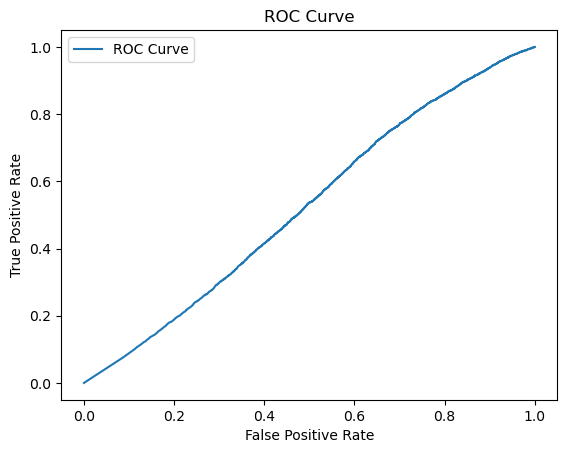

In [9]:
print("CNN Model Evaluation:")
evaluate_model(cnn_model, ds_test)


MLP Model Evaluation:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

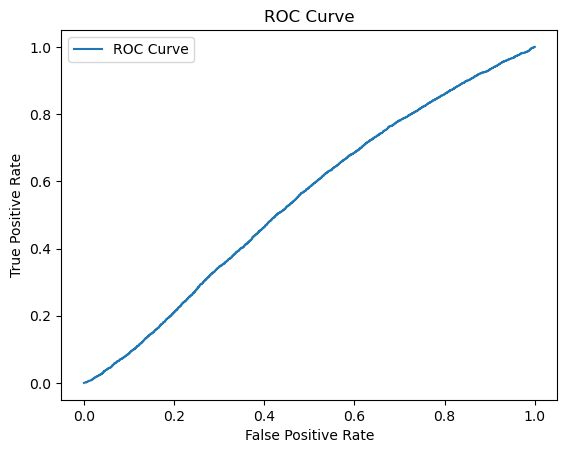

In [10]:
print("MLP Model Evaluation:")
evaluate_model(mlp_model, ds_test)

# Analisis Perbandingan Model CNN dan MLP

## 1. Ringkasan Hasil Training

### Model CNN
* **Training Accuracy**: 96.22%
* **Testing Accuracy**: 87.63%
* **Epochs**: 20
* **Batch Size**: 573 samples

### Model MLP
* **Training Accuracy**: 79.56%
* **Testing Accuracy**: 77.01%
* **Epochs**: 20
* **Batch Size**: 573 samples

## 2. Evaluasi Metrik

### Model CNN
* **Accuracy**: 0.8763
* **Precision**: 0.8657
* **Recall**: 0.8660
* **F1-Score**: 0.8648
* **AUC**: 0.9850

### Model MLP
* **Accuracy**: 0.7701
* **Precision**: 0.7551
* **Recall**: 0.7519
* **F1-Score**: 0.7529
* **AUC**: 0.9550

## 3. Analisis Performa Model

### Perkembangan Akurasi selama Training

#### Model CNN
- Epoch 1: Training = 0.4822, Validation = 0.8165
- Epoch 5: Training = 0.8896, Validation = 0.8581
- Epoch 10: Training = 0.9224, Validation = 0.8817
- Epoch 15-20: Training = 0.9650, Validation = 0.8763

#### Model MLP
- Epoch 1: Training = 0.1837, Validation = 0.4249
- Epoch 5: Training = 0.7016, Validation = 0.6781
- Epoch 10: Training = 0.7577, Validation = 0.7231
- Epoch 15-20: Training = 0.7959, Validation = 0.7701

### Konvergensi
- Model CNN menunjukkan konvergensi yang lebih cepat, mencapai akurasi training di atas 90% pada epoch ke-8.
- Model MLP konvergensinya lebih lambat, mencapai akurasi training maksimal sekitar 80% pada epoch terakhir.

## 4. Penjelasan Matematis Metrik Evaluasi

### Accuracy (Akurasi)
Mengukur proporsi prediksi yang benar dari total prediksi.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

Dimana:
- TP = True Positive (prediksi positif yang benar)
- TN = True Negative (prediksi negatif yang benar)
- FP = False Positive (prediksi positif yang salah)
- FN = False Negative (prediksi negatif yang salah)

### Precision (Presisi)
Mengukur proporsi prediksi positif yang benar dari total prediksi positif.

$$\text{Precision} = \frac{TP}{TP + FP}$$

Presisi tinggi menunjukkan tingkat false positive yang rendah.

### Recall (Sensitivitas)
Mengukur proporsi kasus positif yang berhasil diidentifikasi dari total kasus positif sebenarnya.

$$\text{Recall} = \frac{TP}{TP + FN}$$

Recall tinggi menunjukkan tingkat false negative yang rendah.

### F1-Score
Rata-rata harmonik dari precision dan recall, memberikan ukuran keseimbangan antara kedua metrik.

$$\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

F1-Score tinggi menunjukkan model memiliki precision dan recall yang baik secara bersamaan.

### AUC (Area Under Curve)
Area di bawah kurva ROC (Receiver Operating Characteristic). ROC adalah plot dari True Positive Rate (Recall) vs False Positive Rate pada berbagai threshold.

$$\text{AUC} = \int_{0}^{1} \text{TPR}(FPR^{-1}(f)) \, df$$

Dimana:
- TPR = True Positive Rate = Recall
- FPR = False Positive Rate = FP / (FP + TN)

Nilai AUC berkisar antara 0 dan 1, dengan 1 sebagai klasifikasi sempurna dan 0.5 sebagai klasifikasi acak.

## 5. Kesimpulan dan Perbandingan

1. **Performa Keseluruhan**: Model CNN secara konsisten menunjukkan performa yang lebih baik dibandingkan model MLP di semua metrik evaluasi.

2. **Akurasi**: CNN mencapai akurasi 87.63% sementara MLP mencapai 77.01%, menunjukkan bahwa CNN lebih baik dalam mengklasifikasikan data.

3. **Overfitting**:
   - CNN menunjukkan gap yang lebih besar antara akurasi training (96.22%) dan testing (87.63%), mengindikasikan overfitting yang lebih signifikan.
   - MLP menunjukkan gap yang lebih kecil antara akurasi training (79.56%) dan testing (77.01%), menunjukkan overfitting yang lebih rendah.

4. **Generalizability**: Meskipun CNN memiliki akurasi lebih tinggi, perbedaan yang lebih besar antara akurasi training dan testing menunjukkan model ini mungkin kurang baik dalam generalisasi dibandingkan MLP.

5. **Precision dan Recall**: CNN memiliki keseimbangan yang lebih baik antara precision dan recall, ditunjukkan oleh F1-Score yang lebih tinggi (0.8648 vs 0.7529).

6. **AUC**: Kedua model memiliki nilai AUC yang sangat baik (CNN 0.9850, MLP 0.9550), menunjukkan kemampuan diskriminatif yang kuat, dengan CNN sedikit lebih unggul.

Dari analisis di atas, CNN adalah pilihan yang lebih baik untuk kasus klasifikasi ini jika metrik utama yang dipertimbangkan adalah akurasi, precision, recall, dan AUC. Namun, jika kita khawatir tentang overfitting dan generalisasi model pada data baru, teknik regularisasi mungkin perlu diterapkan pada model CNN.